In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['score']) # df['score'].values
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [4]:
scores.mean()

69.53

In [5]:
# 모집단
len(df)

400

### 임의로 표본 추출 

In [6]:
# 복원이 기본 (나왔던 값이 또 나올수 있음)
np.random.choice([1,2,3,4,5,6,7,8,9,10],3)

array([7, 2, 5])

In [7]:
# 표본
np.random.seed(0) # 똑같은 랜덤결과를 얻기 위해
sample = np.random.choice(scores,20, replace=True) #복원 추출 
print(sample)
print(sample.mean())

[49 60 72 86 52 61 77 91 80 56 69 67 90 56 75 79 60 79 68 81]
70.4


In [8]:
# 분산
sample.var() # 편향 표본분산 (/n)

150.34000000000003

In [9]:
# 표준편차
sample.std() # 편향 표본표준편차

12.261321299109653

In [10]:
sample.var(ddof=1) #비편향 표본분산 (/n-1)

158.25263157894742

In [11]:
for i in range(5):
    sample1 = np.random.choice(scores,20)
    print(i+1,"표본 평균 : ", sample1.mean())

1 표본 평균 :  72.45
2 표본 평균 :  63.7
3 표본 평균 :  66.05
4 표본 평균 :  71.7
5 표본 평균 :  74.15


### 표본이 충분히 크면 모집에 가까워진다.

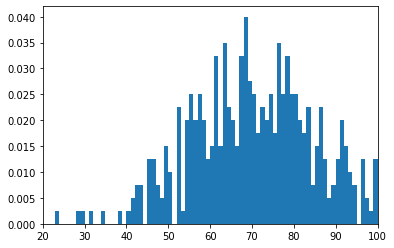

In [12]:
# 모집단을 hist로 표시
# density = True 상대도수
plt.hist(scores, bins=100, range=(0,100), density=True)
plt.xlim(20,100)
plt.show()

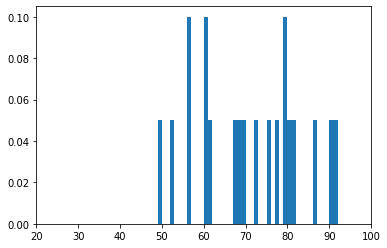

In [13]:
# 표본 데이터 20개
plt.hist(sample, bins=100, range=(0,100), density=True)
plt.xlim(20,100)
plt.show()

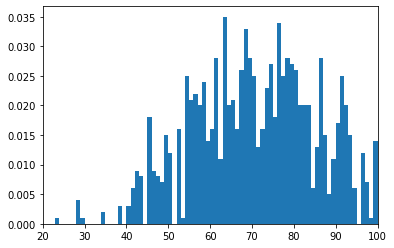

In [27]:
# 표본집단 데이터 1000개
sample2 = np.random.choice(scores,1000) # 1000개 데이터 추출
plt.hist(sample2, bins=100, range=(0,100), density=True)
plt.xlim(20,100)
plt.show()

### 표본의 갯수가 충분히 많으면 모집단에 가까워진다.

In [15]:
n = 20
nSample = 100

# 20개의 데이터가 든 표본이 100개
sample_mean = np.array([np.random.choice(scores, n).mean() for X in range(nSample)])

In [16]:
scores.mean()

69.53

In [17]:
# 표본평균의 평균
sample_mean.mean()

69.84200000000001

In [18]:
# 모평균
print(scores.mean())

# 표본의 평균
print(sample.mean())

# 표본평균의 평균
print(sample_mean.mean())

69.53
70.4
69.84200000000001


In [19]:
# 모분산
# n개의 대한 분산을 알아보기 n으로 나눔
print(scores.var())

# 표본의 분산
print(sample.var()/n)

# 표본평균의 분산 
# (모집단의 분산을 표본의 갯수로 나눔값과 동일)
print(sample_mean.var())
print(scores.var()/n)

206.6691
7.517000000000001
10.084086
10.333454999999999


In [20]:
# 표본평균의 편차 (SEM)
# 모집단의 표준편차에서 n의 루트를 나눠줌
print('sem :', scores.std()/math.sqrt(n))
print('sem :', sample_mean.std())

sem : 3.2145691779770424
sem : 3.175544992595759


## 모평균 추정
- 신뢰구간 1.96(95%신뢰도), 2.58(99%신뢰도)

n명을 임으로 표본 추출<br>
모(진짜)평균(μ:평균), 모(진짜)편차:$ \sigma $  <br>
표본평균:$ \bar{X} $  <br>
$ \bar{X} -k * \dfrac{ \sigma }{ \sqrt{n} } \le m \le \bar{X} +k * \dfrac{ \sigma }{ \sqrt{n} }   $ <br>
k:신뢰도 상수

표본갯수가 30개 이상이면 모표준편차와 표준편차를 동일한 것으로 본다 <br>
$ s = \sigma $

### 평균의 표준 오차(standard error of the mean, SEM)
$ \dfrac{ \sigma }{ \sqrt{n} } $

In [21]:
n = 30
sample1 = np.random.choice(scores,n)
sMean   = sample1.mean()
sStd    = sample1.std()

In [22]:
print('모평균 : ', scores.mean())
print('표본평균 : ', sMean)
print('모편차 : ', scores.std())
print('표본편차 : ', sStd)



모평균 :  69.53
표본평균 :  72.4
모편차 :  14.375990400664575
표본편차 :  16.16704466912037


In [23]:
## 모평균 추정
# 표본평균 - 신뢰도 * 표준오차 
# n이 30이상이면 표준오차에서 (모집단 표준편차/sqrt(n)) 가능\

a = sMean - 1.96*(scores.std()/math.sqrt(n))
b = sMean + 1.96*(scores.std()/math.sqrt(n))

# 95%(k=1.96) 신뢰로 모평균은 66점 ~ 76점사이에 존재한다. (추정)
print(a)
print(b)

67.25561790377115
77.54438209622886


In [24]:
import scipy.stats as st

In [25]:
# 수식으로 계산
# (신뢰도, 표본평균, st.sem(표본집단,ddof=0))
# ddof = 0 (n-1로 구한것이 아니기 때문에)
st.norm.interval(0.95, sample1.mean(), scale=st.sem(sample1, ddof=0))

(66.61480367135924, 78.18519632864077)

In [ ]:
'''
어느 호수의 납의 농도는 표준편차가 3mg/L(scores.std) 이다
이 호수에서 납의 농도를 16(n)번 측정한 결과 평균 농도는 18mg/L(sMean) 이었다.
이 호수에서 남의 농도에 대한 모평균 m 의 신뢰도 95%(k)의 신뢰구간을 구하여라.
'''
# 모편차를 알고 있는 문제

In [30]:
# 표본평균 - 신뢰도 * (표본표준편차 / sqrt(n)))
print(18 - 1.96*(3/math.sqrt(16)))
print(18 + 1.96*(3/math.sqrt(16)))

16.53
19.47


In [ ]:
'''
어느 고등학교 남학생 36명(n)의 제자리멀리뛰기 기록은 평균이 216cm(sMean) 표준편차가 10cm(.std())이었다.
이 학교 남학생들의 제자리 멀리뛰기 기록에 대한 모평균 m의 신뢰도 99% 신뢰구간을 구하여라..
'''
# 모편차는 모르지만 n > 30이상이라 표준편차를 그대로 사용

In [32]:
print(216 - 2.58*(10/math.sqrt(36)))
print(216 + 2.58*(10/math.sqrt(36)))


211.7
220.3


### 중심 극한의 정리 : 표본의 크기가 클때 정규분포 형태에 가까워진다.

In [60]:
n = 20
nSample = 10000

# 20개의 데이터가 든 표본이 10000개
sample_mean = np.array([np.random.choice(scores, n).mean() for X in range(nSample)])

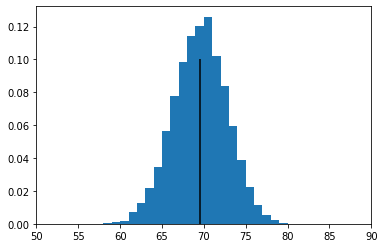

In [61]:
# bins 계급을 100개로 나눔, range x축의 범위, y축 값을 표시
# 종모양은 정규분포
plt.hist(sample_mean, bins=100, range=(0,100), density=True)
plt.xlim(50,90) # x축 값의 범위지정
plt.vlines(scores.mean(), 0,0.1) # 모집단의 평균지정
# plt.axvline(scores  )
plt.show()

# 표본집단평균이 모집단의 평균주위에 몰려있다.